# LGBM 라벨인코딩 변수선택

In [55]:
# 필요한 sklearn import 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [57]:
# train data set
loan_train = pd.read_csv('prelabel_loan_train.csv')

In [58]:
loan_train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,...,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,C,D3,RENT,39833.92100,Source Verified,...,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,...,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,...,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,...,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63241,11440,17672,22965.76290,59,15.025260,C,B1,RENT,76128.78634,Verified,...,0.061096,0.325564,0,INDIVIDUAL,151,0,38,859647,21468,0
63242,8323,11046,15637.46301,59,9.972104,C,B3,RENT,65491.12817,Source Verified,...,2.015494,1.403368,0,INDIVIDUAL,14,0,37,22692,8714,0
63243,15897,32921,12329.45775,59,19.650943,A,F3,MORTGAGE,34813.96985,Verified,...,5.673092,1.607093,0,INDIVIDUAL,137,0,17,176857,42330,0
63244,16567,4975,21353.68465,59,13.169095,D,E3,OWN,96938.83564,Not Verified,...,1.157454,0.207608,0,INDIVIDUAL,73,0,61,361339,39075,0


In [59]:
object_train = loan_train[["Grade", "Sub Grade", "Home Ownership","Verification Status",
 "Loan Title", "Initial List Status","Application Type"]]
object_train.columns

Index(['Grade', 'Sub Grade', 'Home Ownership', 'Verification Status',
       'Loan Title', 'Initial List Status', 'Application Type'],
      dtype='object')

In [60]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder

for i in object_train.columns:
    encoder = LabelEncoder()
    loan_train[i] = encoder.fit_transform(loan_train[i])
    loan_decoded = {val: i for i, val in enumerate(encoder.classes_)}

    # 인코딩 전의 원래 값과 인코딩된 값을 딕셔너리로 만든 형태를 출력
    print(f'{i}_dict = {loan_decoded}')

Grade_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
Sub Grade_dict = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34}
Home Ownership_dict = {'MORTGAGE': 0, 'OWN': 1, 'RENT': 2}
Verification Status_dict = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}
Loan Title_dict = {'business loan': 0, 'car loan': 1, 'consolidation': 2, 'credit card loan': 3, 'credit loan': 4, 'debt': 5, 'medical': 6, 'mortgage loan': 7, 'other': 8, 'payoff': 9, 'personal loan': 10}
Initial List Status_dict = {'f': 0, 'w': 1}
Application Type_dict = {'INDIVIDUAL': 0, 'JOINT': 1}


In [61]:
# 인코딩 전의 원래 값과 인코딩된 값을 딕셔너리로 만듦
Grade_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
Sub_Grade_dict = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34},
Home_Ownership_dict = {'MORTGAGE': 0, 'OWN': 1, 'RENT': 2},
Verification_Status_dict = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2},
Loan_Title_dict = {'business loan': 0, 'car loan': 1, 'consolidation': 2, 'credit card loan': 3, 'credit loan': 4, 'debt': 5, 'medical': 6, 'mortgage loan': 7, 'other': 8, 'payoff': 9, 'personal loan': 10},
Initial_List_Status_dict = {'f': 0, 'w': 1},
Application_Type_dict = {'INDIVIDUAL': 0, 'JOINT': 1}

In [62]:
loan_train

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,...,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,10000,32236,12329.36286,59,11.135007,1,13,0,176346.62670,0,...,2.498291,0.793724,0,0,49,0,31,311301,6619,0
1,3609,11940,12191.99692,59,12.237563,2,17,2,39833.92100,1,...,2.377215,0.974821,0,0,109,0,53,182610,20885,0
2,28276,9311,21603.22455,59,12.545884,5,18,0,91506.69105,1,...,4.316277,1.020075,0,0,66,0,34,89801,26155,0
3,11170,6954,17877.15585,59,16.731201,2,12,0,108286.57590,1,...,0.107020,0.749971,0,0,39,0,40,9189,60214,0
4,16890,13226,13539.92667,59,15.008300,2,18,0,44234.82545,1,...,1294.818751,0.368953,0,0,18,0,430,126029,22579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63241,11440,17672,22965.76290,59,15.025260,2,5,2,76128.78634,2,...,0.061096,0.325564,0,0,151,0,38,859647,21468,0
63242,8323,11046,15637.46301,59,9.972104,2,7,2,65491.12817,1,...,2.015494,1.403368,0,0,14,0,37,22692,8714,0
63243,15897,32921,12329.45775,59,19.650943,0,27,0,34813.96985,2,...,5.673092,1.607093,0,0,137,0,17,176857,42330,0
63244,16567,4975,21353.68465,59,13.169095,3,22,1,96938.83564,0,...,1.157454,0.207608,0,0,73,0,61,361339,39075,0


In [63]:
# 인코딩 된 값을 디코딩하여 딕셔너리로 변환
loan_encoding = {i: val for i, val in enumerate(encoder.classes_)}
loan_decoded = {val: i for i, val in enumerate(encoder.classes_)}

print(loan_encoding)  # {0: 'apple', 1: 'banana', 2: 'orange'}
print(loan_decoded)   # {'apple': 0, 'banana': 1, 'orange': 2}

{0: 'INDIVIDUAL', 1: 'JOINT'}
{'INDIVIDUAL': 0, 'JOINT': 1}


In [64]:
# train data set의 컬럼 확인 
loan_train.columns

Index(['Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term',
       'Interest Rate', 'Grade', 'Sub Grade', 'Home Ownership',
       'Employment Duration', 'Verification Status', 'Loan Title',
       'Debit to Income', 'Delinquency - two years', 'Inquires - six months',
       'Open Account', 'Public Record', 'Revolving Balance',
       'Revolving Utilities', 'Total Accounts', 'Initial List Status',
       'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
       'Collection Recovery Fee', 'Collection 12 months Medical',
       'Application Type', 'Last week Pay', 'Accounts Delinquent',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit', 'Loan Status'],
      dtype='object')

In [65]:
# 컬럼간의 상관관계 확인
# plt.figure(figsize = (14, 14))
# sns.heatmap(loan_train.corr(), annot = True, annot_kws={"size": 5})
# plt.savefig('corr.png');

**object의 컬럼을 label encoding 할 필요성이 있어 보임  
null 값이 하나도 없음**

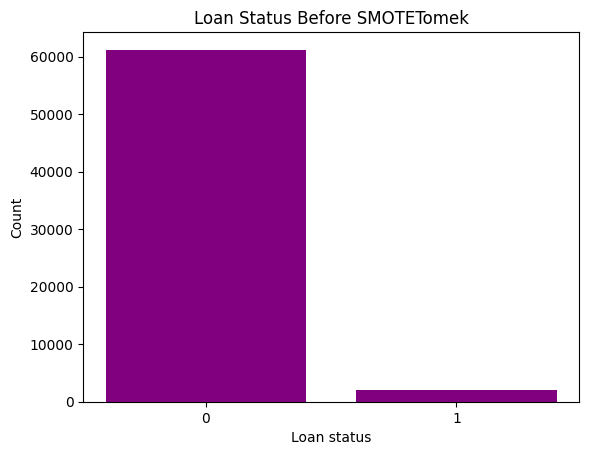

In [66]:
import matplotlib.pyplot as plt

# ytrain 데이터프레임에서 'loan status' 컬럼의 값이 0인 데이터와 1인 데이터의 개수 구하기
zero_count = (loan_train['Loan Status'] == 0).sum()
one_count = (loan_train['Loan Status'] == 1).sum()

# 그래프 그리기
plt.bar([0, 1], [zero_count, one_count], color='purple')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.title('Loan Status Before SMOTETomek')
plt.show()


In [67]:
X = loan_train.drop("Loan Status", axis = 1)
y = loan_train["Loan Status"]

In [68]:
# 타겟의 비대칭 데이터 문제를 해결하기 위하여 SMOTETomek를 사용

#데이터 클래스 비율이 너무 차이가 나면(highly-imbalanced data) 
#단순히 우세한 클래스를 택하는 모형의 정확도가 높아지므로 모형의 성능판별이 어려워진다. 
#즉, 정확도(accuracy)가 높아도 데이터 갯수가 적은 클래스의 재현율(recall-rate)이 급격히 작아지는 현상이 발생할 수 있다.

from imblearn.combine import SMOTETomek
from collections import Counter
Counter(y)

os=SMOTETomek(sampling_strategy='auto', random_state = 20)
X_train_ns,y_train_ns=os.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 61222, 1: 2024})
The number of classes after fit Counter({0: 61176, 1: 61176})


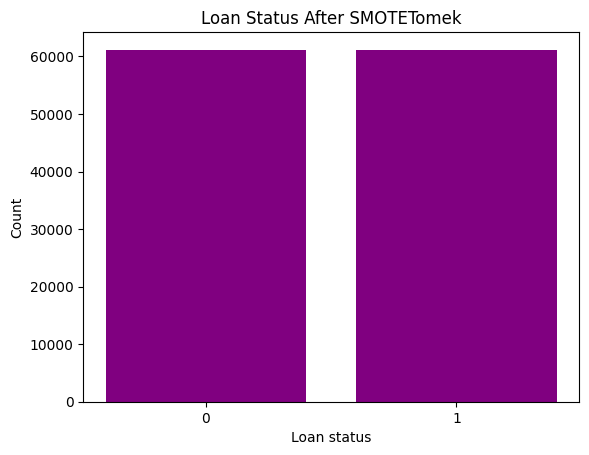

In [69]:
import matplotlib.pyplot as plt

# ytrain 데이터프레임에서 'loan status' 컬럼의 값이 0인 데이터와 1인 데이터의 개수 구하기
zero_count = (y_train_ns == 0).sum()
one_count = (y_train_ns == 1).sum()

# 그래프 그리기
plt.bar([0, 1], [zero_count, one_count], color='purple')
plt.xticks([0, 1], ['0', '1'])
plt.xlabel('Loan status')
plt.ylabel('Count')
plt.title('Loan Status After SMOTETomek')
plt.show()


In [70]:
# 데이터 셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_ns, y_train_ns, test_size = 0.25, random_state = 20, stratify = y_train_ns)
y_train_ns.value_counts(True), y_test.value_counts(True)
len(X_train.columns)

31

# SelectFromModel 사용

In [71]:
from sklearn.feature_selection import SelectFromModel

f_select = SelectFromModel(LGBMClassifier(random_state = 20),  max_features = 31)
f_select.fit(X_train, y_train)
f_scores = pd.DataFrame()

In [72]:
f_scores['attribute'] = X_train.columns
f_scores['support'] = f_select.get_support()
from_model = f_scores[f_scores['support'] == True]["attribute"].values
from_model

array(['Funded Amount', 'Funded Amount Investor', 'Interest Rate',
       'Employment Duration', 'Loan Title', 'Debit to Income',
       'Open Account', 'Revolving Balance', 'Revolving Utilities',
       'Total Received Interest', 'Total Received Late Fee', 'Recoveries',
       'Collection Recovery Fee', 'Last week Pay',
       'Total Collection Amount', 'Total Current Balance',
       'Total Revolving Credit Limit'], dtype=object)

# SelectKBest 사용

In [73]:
kbest = ['Delinquency - two years', 'Open Account', 'Total Received Interest',
       'Home Ownership', 'Loan Title', 'Revolving Balance',
       'Verification Status', 'Initial List Status', 'Total Collection Amount',
       'Total Received Late Fee', 'Funded Amount Investor',
       'Employment Duration', 'Total Revolving Credit Limit',
       'Inquires - six months', 'Term', 'Recoveries', 'Total Current Balance',
       'Public Record', 'Grade', 'Funded Amount', 'Last week Pay',
       'Debit to Income', 'Interest Rate', 'Collection Recovery Fee',
       'Sub Grade', 'Total Accounts', 'Revolving Utilities']

In [74]:
select = list(set(kbest).union(set(from_model)))
len(select)

27

In [75]:
select.sort()
select

['Collection Recovery Fee',
 'Debit to Income',
 'Delinquency - two years',
 'Employment Duration',
 'Funded Amount',
 'Funded Amount Investor',
 'Grade',
 'Home Ownership',
 'Initial List Status',
 'Inquires - six months',
 'Interest Rate',
 'Last week Pay',
 'Loan Title',
 'Open Account',
 'Public Record',
 'Recoveries',
 'Revolving Balance',
 'Revolving Utilities',
 'Sub Grade',
 'Term',
 'Total Accounts',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Received Interest',
 'Total Received Late Fee',
 'Total Revolving Credit Limit',
 'Verification Status']

In [76]:
# 선별한 특성들 카테고리에 맞게 재 분류  

# 재무 관련:

# Collection Recovery Fee: 회수 수수료  
# Funded Amount: 대출금액  
# Funded Amount Investor: 투자자 대출금액  
# Interest Rate: 이자율  
# Recoveries: 회수액  
# Term: 대출 기간  
# Total Collection Amount: 총 회수액  
# Total Received Interest: 총 이자 수입  
# Total Received Late Fee: 총 연체료 수입  

# 신용 관련:  

# Debit to Income: 월부채 대수입 비율
# Delinquency - two years: 2년 내 연체 횟수
# Grade: 대출 등급
# Inquires - six months: 최근 6개월 신용조회 횟수
# Open Account: 개설된 대출 계좌 수
# Public Record: 공공기록
# Revolving Balance: 회전잔액
# Revolving Utilities: 신용카드 한도 사용액
# Sub Grade: 서브등급
# Total Accounts: 총 대출 계좌 수
# Total Current Balance: 총 현재 잔액
# Total Revolving Credit Limit: 총 신용카드 한도

# 고용 관련:

# Employment Duration: 고용 기간
# Last week Pay: 최근 1주간 급여

# 생활 관련:

# Home Ownership: 주택 소유 여부

# 기타:

# Initial List Status: 대출 상태
# Loan Title: 대출 목적
# Verification Status: 인증 상태

In [77]:
select = ['Collection Recovery Fee',
'Funded Amount',
'Funded Amount Investor',
'Interest Rate',
'Recoveries',
'Term',
'Total Collection Amount',
'Total Received Interest',
'Total Received Late Fee',
'Debit to Income',
'Delinquency - two years',
'Grade',
'Inquires - six months',
'Open Account',
'Public Record',
'Revolving Balance',
'Revolving Utilities',
'Sub Grade',
'Total Accounts',
'Total Current Balance',
'Total Revolving Credit Limit',
'Employment Duration',
'Last week Pay',
'Home Ownership',
'Initial List Status',
'Loan Title',
'Verification Status']
select

['Collection Recovery Fee',
 'Funded Amount',
 'Funded Amount Investor',
 'Interest Rate',
 'Recoveries',
 'Term',
 'Total Collection Amount',
 'Total Received Interest',
 'Total Received Late Fee',
 'Debit to Income',
 'Delinquency - two years',
 'Grade',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Sub Grade',
 'Total Accounts',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Employment Duration',
 'Last week Pay',
 'Home Ownership',
 'Initial List Status',
 'Loan Title',
 'Verification Status']

In [78]:
X = X_train_ns[select]
y = y_train_ns

In [79]:
# 데이터 셋 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20, stratify = y)
y_train.value_counts(True), y_test.value_counts(True)

(0    0.5
 1    0.5
 Name: Loan Status, dtype: float64,
 0    0.5
 1    0.5
 Name: Loan Status, dtype: float64)

# LGBM 예측 및 시행

In [80]:
lgbm_clf = LGBMClassifier(n_jobs=-1 , random_state= 20, n_estimators = 1000)

# 학습
lgbm_clf.fit(X_train,y_train)

LGBMClassifier(n_estimators=1000, random_state=20)

In [81]:
from getscore import get_eval_score
get_eval_score(y_train, lgbm_clf.predict(X_train), lgbm_clf.predict_proba(X_train)[:,1])
get_eval_score(y_test, lgbm_clf.predict(X_test),lgbm_clf.predict_proba(X_test)[:,1])

----------------------------------------------------------------------------------------------------
오차행렬:
[[45537   345]
 [    2 45880]]
정확도: 0.9962186 정밀도: 0.9925365 재현율: 0.9999564 F1:0.9962326 AUC: 0.9999597
----------------------------------------------------------------------------------------------------
오차행렬:
[[14447   847]
 [  137 15157]]
정확도: 0.9678305 정밀도: 0.9470757 재현율: 0.9910422 F1:0.9685603 AUC: 0.9958733


In [82]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91764 entries, 54782 to 89245
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Collection Recovery Fee       91764 non-null  float64
 1   Funded Amount                 91764 non-null  int64  
 2   Funded Amount Investor        91764 non-null  float64
 3   Interest Rate                 91764 non-null  float64
 4   Recoveries                    91764 non-null  float64
 5   Term                          91764 non-null  int64  
 6   Total Collection Amount       91764 non-null  int64  
 7   Total Received Interest       91764 non-null  float64
 8   Total Received Late Fee       91764 non-null  float64
 9   Debit to Income               91764 non-null  float64
 10  Delinquency - two years       91764 non-null  int64  
 11  Grade                         91764 non-null  int32  
 12  Inquires - six months         91764 non-null  int64  
 1

In [83]:
# 인코딩 전의 원래 값과 인코딩된 값을 딕셔너리로 만듦
Grade_dict = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6},
Sub_Grade_dict = {'A1': 0, 'A2': 1, 'A3': 2, 'A4': 3, 'A5': 4, 'B1': 5, 'B2': 6, 'B3': 7, 'B4': 8, 'B5': 9, 'C1': 10, 'C2': 11, 'C3': 12, 'C4': 13, 'C5': 14, 'D1': 15, 'D2': 16, 'D3': 17, 'D4': 18, 'D5': 19, 'E1': 20, 'E2': 21, 'E3': 22, 'E4': 23, 'E5': 24, 'F1': 25, 'F2': 26, 'F3': 27, 'F4': 28, 'F5': 29, 'G1': 30, 'G2': 31, 'G3': 32, 'G4': 33, 'G5': 34},
Home_Ownership_dict = {'MORTGAGE': 0, 'OWN': 1, 'RENT': 2},
Verification_Status_dict = {'Not Verified': 0, 'Source Verified': 1, 'Verified': 2},
Loan_Title_dict = {'business loan': 0, 'car loan': 1, 'consolidation': 2, 'credit card loan': 3, 'credit loan': 4, 'debt': 5, 'medical': 6, 'mortgage loan': 7, 'other': 8, 'payoff': 9, 'personal loan': 10},
Initial_List_Status_dict = {'f': 0, 'w': 1},
Application_Type_dict = {'INDIVIDUAL': 0, 'JOINT': 1}

In [84]:
# case1: y_train값이 1(연체)인 X_train

In [85]:
# 대출 연체자 찾기
i = 0
while True:
    if y_train.iloc[i] == 1:
        print(i)
        break
    else:
        i += 1

1


In [86]:
y_train.iloc[1]

1

In [87]:
X_train.iloc[1]

Collection Recovery Fee             1.082664
Funded Amount                   11108.000000
Funded Amount Investor           6879.402901
Interest Rate                      16.617961
Recoveries                          4.668272
Term                               59.000000
Total Collection Amount            40.000000
Total Received Interest          1149.145064
Total Received Late Fee             0.013078
Debit to Income                    24.489948
Delinquency - two years             0.000000
Grade                               1.000000
Inquires - six months               0.000000
Open Account                       12.000000
Public Record                       0.000000
Revolving Balance                5058.000000
Revolving Utilities                53.540547
Sub Grade                           8.000000
Total Accounts                     17.000000
Total Current Balance           79374.000000
Total Revolving Credit Limit    20396.000000
Employment Duration             97810.511939
Last week 

In [88]:
# case2: y_train값이 0(비연체)인 X_train

In [89]:
# 대출 비연체자 찾기
i = 0
while True:
    if y_train.iloc[i] == 0:
        print(i)
        break
    else:
        i += 1

0


In [90]:
y_train.iloc[0]

0

In [91]:
X_train.iloc[0]

Collection Recovery Fee              0.802521
Funded Amount                    11690.000000
Funded Amount Investor           23381.870560
Interest Rate                       10.154635
Recoveries                           3.508713
Term                                59.000000
Total Collection Amount             28.000000
Total Received Interest           2513.286450
Total Received Late Fee              0.006396
Debit to Income                     17.643272
Delinquency - two years              0.000000
Grade                                1.000000
Inquires - six months                0.000000
Open Account                        11.000000
Public Record                        0.000000
Revolving Balance                 2092.000000
Revolving Utilities                 35.187991
Sub Grade                            8.000000
Total Accounts                      17.000000
Total Current Balance           152939.000000
Total Revolving Credit Limit      1497.000000
Employment Duration              5

In [92]:
# case3: y_test값이 1(연체)인 X_test

In [93]:
y_pred = lgbm_clf.predict(X_test)

In [94]:
y_pred = pd.Series(y_pred)

In [95]:
# 대출 연체자 찾기
i = 0
while True:
    if y_pred.iloc[i] == 1:
        print(i)
        break
    else:
        i += 1

3


In [96]:
y_pred.iloc[3]

1

In [97]:
y_test.iloc[3]

1

In [98]:
X_test.iloc[3]

Collection Recovery Fee             1.186336
Funded Amount                   30156.000000
Funded Amount Investor          12359.852045
Interest Rate                      19.720397
Recoveries                          3.215426
Term                               59.000000
Total Collection Amount            24.000000
Total Received Interest           873.644832
Total Received Late Fee             0.036519
Debit to Income                    16.442115
Delinquency - two years             0.000000
Grade                               1.000000
Inquires - six months               0.000000
Open Account                       10.000000
Public Record                       0.000000
Revolving Balance                3307.000000
Revolving Utilities                60.590296
Sub Grade                           2.000000
Total Accounts                     24.000000
Total Current Balance           59838.000000
Total Revolving Credit Limit    42179.000000
Employment Duration             97911.557271
Last week 

In [99]:
# case4: y_test값이 0(비연체)인 X_test

In [100]:
y_pred.iloc[0]

0

In [101]:
y_test.iloc[0]

0

In [102]:
X_test.iloc[0]

Collection Recovery Fee             1.019765
Funded Amount                   23617.000000
Funded Amount Investor          13260.016360
Interest Rate                       7.231365
Recoveries                          4.300204
Term                               58.000000
Total Collection Amount            30.000000
Total Received Interest         12570.955060
Total Received Late Fee             0.072998
Debit to Income                    20.003506
Delinquency - two years             0.000000
Grade                               2.000000
Inquires - six months               0.000000
Open Account                       12.000000
Public Record                       0.000000
Revolving Balance                6814.000000
Revolving Utilities                88.980244
Sub Grade                          10.000000
Total Accounts                     25.000000
Total Current Balance           26870.000000
Total Revolving Credit Limit     4635.000000
Employment Duration             70852.561250
Last week 

In [103]:
# 여기까지 실행 후 리스트 복사해서 아래 셀 # GUI 위젯 생성에 labels 
X_train_col_list = list(X_train.columns)
X_train_col_list

['Collection Recovery Fee',
 'Funded Amount',
 'Funded Amount Investor',
 'Interest Rate',
 'Recoveries',
 'Term',
 'Total Collection Amount',
 'Total Received Interest',
 'Total Received Late Fee',
 'Debit to Income',
 'Delinquency - two years',
 'Grade',
 'Inquires - six months',
 'Open Account',
 'Public Record',
 'Revolving Balance',
 'Revolving Utilities',
 'Sub Grade',
 'Total Accounts',
 'Total Current Balance',
 'Total Revolving Credit Limit',
 'Employment Duration',
 'Last week Pay',
 'Home Ownership',
 'Initial List Status',
 'Loan Title',
 'Verification Status']

In [104]:
import joblib
# 모델 저장
joblib.dump(lgbm_clf, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [105]:
import joblib

# 모델 로드
lgbm_clf = joblib.load('lgbm_model.pkl')

In [106]:
# tkinter 구현

# 필요한 라이브러리 불러오기
import tkinter as tk
from tkinter import *
from tkinter import messagebox

# GUI 생성
window = Tk()
window.title("대출 상환 예측")
window.resizable(False, False)

# GUI 위젯 생성
labels = list(X_train.columns)

entries = []

for i, label_text in enumerate(labels):
    lbl = Label(window, text=label_text)
    lbl.grid(row=i, column=0, padx=10, pady=2)
    
    entry = Entry(window)
    entry.grid(row=i, column=1, padx=10, pady=2)
    entries.append(entry)

result_lbl = Label(window, text="")
result_lbl.grid(row=len(labels)+1, column=1, padx=10, pady=2)

def predict():
    # 입력 데이터 가져오기
    input_data = [int(entry.get()) for entry in entries]

    # 생존 예측
    result = lgbm_clf.predict([input_data])

    # 예측 결과 출력
    if result == 1:
        result_lbl.configure(text="결과: 연체!")
    else:
        result_lbl.configure(text="결과: 비연체!")
        
btn = Button(window, text="Predict", command=predict)
btn.grid(row=len(labels)+1, column=0, padx=10, pady=10)

window.mainloop()
